## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [17]:
poll.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [19]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [22]:
np.where(np.random.rand(5)<.51,'brown','green')

array(['brown', 'brown', 'brown', 'brown', 'green'], dtype='<U5')

In [29]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n)<brown,'Brown','Green')})

In [30]:
s = sample(0.51,n=1000)

In [31]:
s.vote.value_counts(normalize = True)

Green    0.518
Brown    0.482
Name: vote, dtype: float64

In [32]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [33]:
dist.head()

,Brown,Green
vote,0.527,0.473
vote,0.487,0.513
vote,0.512,0.488
vote,0.513,0.487
vote,0.508,0.492


<AxesSubplot:>

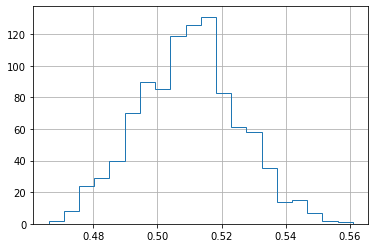

In [34]:
dist.Brown.hist(histtype='step',bins=20)

In [35]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [38]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [39]:
quantiles(0.5)

(0.471, 0.531)

In [41]:
quantiles(0.48)

(0.449, 0.51)

In [42]:
quantiles(0.54)

(0.51, 0.5690249999999999)